## Summary

This project has been an eye-opening experience, introducing me to the fundamentals of neural networks. The steep learning curve of building a neural network from scratch—without relying on pre-built machine learning libraries—has been immensely rewarding. Through this journey, I gained a deep understanding of matrix multiplication, harnessed the dynamic capabilities of NumPy, and learned the value of persistence when facing continuous errors. I explored various activation functions and implemented gradient descent for optimizing the model. This process has significantly enriched my knowledge and problem-solving skills in neural networks.

Sivagugan Jayachandran

In [504]:
import matplotlib.pyplot as plt
import numpy as np
import os

In [505]:
path = '/Users/sivaguganjayachandran/Documents/python programming/Neural-Network---MultiClass-Classifcation-with-Softmax-main'

In [506]:
X_train = np.genfromtxt(path+ '/train_X.csv', delimiter=',').T
Y_train = np.genfromtxt(path+ '/train_label.csv', delimiter = ',').T

X_test  = np.genfromtxt(path + '/test_X.csv', delimiter=',').T
Y_test  = np.genfromtxt(path + '/test_label.csv', delimiter = ',').T 


print(f''' 
X_train : {X_train.shape}
Y_train : {Y_train.shape} \n 
X_test  : {X_test.shape}
Y_test  : {Y_test.shape} 
''')

 
X_train : (784, 1000)
Y_train : (10, 1000) 
 
X_test  : (784, 350)
Y_test  : (10, 350) 



 Image : 5


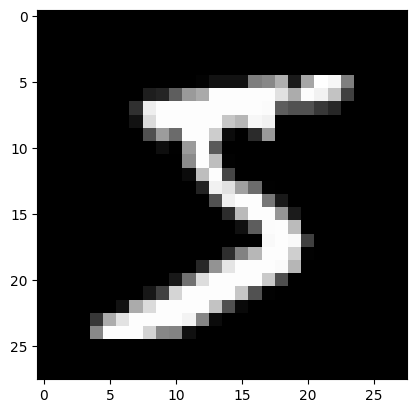

In [507]:
index = np.random.randint(0,1000, size = (1,1))

plt.imshow(X_train[:,index].reshape(28,28), cmap='grey')

print(f' Image : {np.argmax(Y_train[:,index]) }')

In [508]:
# Matrix Multiplications 

def tanh(x):
    return np.tanh(x)

def relu(x):
    return np.where(x>0,x,0)

def derivative_tanh(x):
    return (1 - np.power(np.tanh(x), 2))

def derivative_relu(x):
    return np.array(x > 0, dtype = np.float32)

def softmax(y):
    x = np.exp(y)
    return x / np.sum(x, axis=0, keepdims = True)

In [509]:
def initialize_parameters(x, y, n_h):
    m = x.shape[1]
    n_x = x.shape[0]
    n_y = y.shape[0]
        
    w1 = np.random.randn(n_h,n_x)*0.01
    b1 = np.random.randn(n_h,1)
    
    w2 = np.random.randn(n_y,n_h)*0.01
    b2 = np.random.randn(n_y,1)

    parameters = {
        'x'  : x,
        'y'  : y,
        'm'  : m,
        'w1' : w1,
        'b1' : b1,
        'w2' : w2,
        'b2' : b2,
        'cost' : []
    }

    return parameters

In [510]:
def forward_propagation(parameters, activation = 'tanh'):
    w1 = parameters['w1']
    b1 = parameters['b1']
    
    w2 = parameters['w2']
    b2 = parameters['b2']
    
    a0 = parameters['x']
    z1 = np.dot(w1,a0) + b1

    if activation.lower() == 'tanh':
        a1 = tanh(z1)
    elif activation.lower() == 'relu':
        a1 = relu(z1)
    #a1 = np.where(z1>0,z1,0)
    
    z2 = np.dot(w2,a1) + b2
    
    
    #z2 = z2/np.max(z2,axis=0)
    #z2_exp = np.exp(z2 - np.max(z2,axis=0, keepdims= True))
    
    a2 = softmax(z2)
    
    parameters.update({
        'z1' : z1,
        'z2' : z2,
        'a1' : a1,
        'a2' : a2
    })
    
    return parameters

In [511]:
def cost_function(parameters):
    y  = parameters['y']
    a2 = parameters['a2']
    m  = parameters['m']
    loss = np.sum(y * -np.log(a2))/m

    parameters['cost'].append(loss)
    
    return parameters

In [512]:
def gradient_descent(parameters, activation = 'tanh', input = 'a'):
    a2 = parameters['a2']
    y  = parameters['y']
    a1 = parameters['a1']
    m  = parameters['m']
    w2 = parameters['w2']
    z1 = parameters['z1']
    a0 = parameters['x']

    
    dz2 = a2 - y
    dw2 =   (1/m) * np.dot(dz2, a1.T)
    db2 = ( (1/m) * np.sum(dz2, axis = 1, keepdims = True) )
    
    #dz1 = np.dot(w2.T,dz2) * derivative_tanh(z1)
    dz1 = np.dot(w2.T,dz2) * derivative_tanh(a1)

    if activation == 'tanh' and input == 'a':
        dz1 = np.dot(w2.T,dz2) * derivative_tanh(a1)
    if activation == 'tanh' and input == 'z':
        dz1 = np.dot(w2.T,dz2) * derivative_tanh(z1)
    if activation == 'relu' and input == 'a':
        dz1 = np.dot(w2.T,dz2) * derivative_relu(a1)
    if activation == 'relu' and input == 'z':
        dz1 = np.dot(w2.T,dz2) * derivative_relu(z1)
    
    dw1 = (1/m) * np.dot(dz1,a0.T)
    db1 = ( (1/m) * np.sum(dz1,axis = 1, keepdims = True) )

    parameters.update({
        'dz1' : dz1,
        'dw1' : dw1,
        'db1' : db1,
        'dz2' : dz2,
        'dw2' : dw2,
        'db2' : db2
    })
    
    return parameters

In [513]:
def update_parameters(parameters, learning_rate):
    
    w1 = parameters['w1']
    w2 = parameters['w2']
    b1 = parameters['b1']
    b2 = parameters['b2']
    
    dw1 = parameters['dw1']
    dw2 = parameters['dw2']
    db1 = parameters['db1']
    db2 = parameters['db2']
    
    w2 = w2 - learning_rate * dw2
    b2 = b2 - learning_rate * db2
    
    w1 = w1 - learning_rate * dw1
    b1 = b1 - learning_rate * db1

    parameters.update({
        'w1' : w1,
        'w2' : w2,
        'b1' : b1,
        'b2' : b2
    })

    return parameters

In [514]:
def accuracy(parameters):
    y = parameters['y']
    y_hat = parameters['a2']
    accuracy =  np.mean( np.argmax(y, axis = 0) == np.argmax(y_hat, axis=0) )
    parameters.update({'accuracy' : round(accuracy,4)})
    return parameters

In [532]:
def neural_network( x, y, n_h, iterations = 100, learning_rate = 0.02, activation = 'tanh', input='a'):
    parameters    = {}
    parameters    = initialize_parameters(x,y,n_h)
    
    for i in range(iterations):
        parameters    = forward_propagation(parameters, activation = activation)
        parameters    = cost_function(parameters)
        parameters    = gradient_descent(parameters, activation = activation, input = input)
        parameters    = update_parameters(parameters, learning_rate = learning_rate)
        #print(f' {i} : {round(parameters_1['cost'][-1],15)} ')
    parameters = accuracy(parameters)
    return parameters

 Cost function : 0.13035 
 Accuracy : 99.1% 


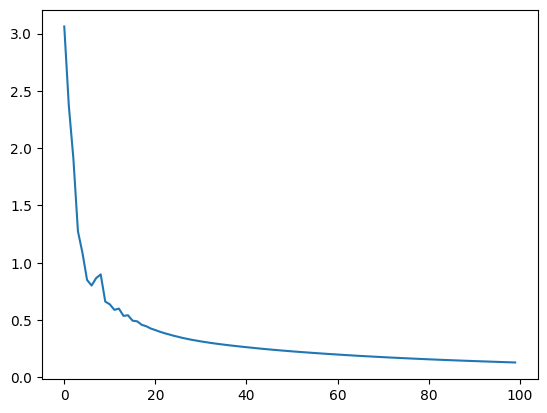

In [533]:
parameters_train = neural_network(X_train, Y_train, n_h = 1000, iterations = 100, learning_rate = 0.01, activation = 'tanh', input = 'a')

plt.plot(parameters_train['cost'][0:])
print(f' Cost function : {round(parameters_train['cost'][-1],5)} ')
print(f' Accuracy : {parameters_train['accuracy'] * 100}% ')

In [535]:
# calculate the output for test data 
parameters_test = parameters_train.copy() #use copy() method to create two objects so that they are independant of each other

parameters_test.update({
    'x' : X_test,
    'y' : Y_test,
    'm' : Y_test.shape[1],
    'cost' : [],
    'accuracy' : False
})

parameters_test = forward_propagation(parameters_test, activation = 'tanh')
parameters_test = cost_function(parameters_test)
parameters_test = accuracy(parameters_test)
print(f' Cost function : {round(parameters_test['cost'][-1],5)} ')
print(f' Accuracy : {parameters_test['accuracy'] * 100}% ')

 Cost function : 0.44747 
 Accuracy : 86.29% 


In [540]:
dict = { 
    'Dataset' : ['train','test'],
    'Cost_function' :[round(parameters_train['cost'][-1],2), round(parameters_test['cost'][-1],2) ],
    'Accuracy ( % )' : [parameters_train['accuracy']*100, parameters_test['accuracy']*100 ]
} 

In [541]:
import pandas as pd
df = pd.DataFrame(dict)
df.set_index('Dataset',inplace = True)

In [542]:
df.loc['delta ( test - train )'] = df.loc['test'] - df.loc['train']
df

,Cost_function,Accuracy ( % )
Dataset,,
train,0.13,99.10
test,0.45,86.29
delta ( test - train ),0.32,-12.81


 Actual Number    : 3 
 Predicted Number : 3 


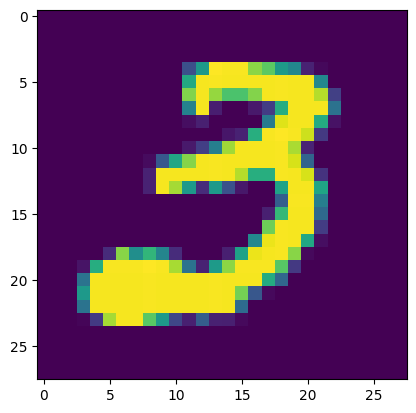

In [543]:
index = np.random.randint(0,Y_test.shape[1])

plt.imshow(X_test[:,index].reshape(28,28))

print(f' Actual Number    : {np.argmax(Y_test[:,index])} ')

print(f' Predicted Number : { np.argmax(parameters_test['a2'][:,index]) } ')
